# Análisis Integral de Variables - UPV Bachelor y Masterstudium

Este notebook consolida todos los análisis univariantes de las variables clave del Panel Maestro UPV:
- **Tasa de Abandono**: Porcentaje de estudiantes que abandonan los programas
- **Autoeficacia**: Percepción de competencia de los graduados
- **Empleabilidad (No Desempleados)**: Porcentaje de graduados empleados
- **Satisfacción**: Nivel de satisfacción de estudiantes y profesores

El objetivo es proporcionar una visión completa de todas las variables que utilizaremos en análisis posteriores.

---
**Fecha de análisis**: 2024
**Dataset**: panel_maestro_UPV_LIMPIO.csv

## 1. Importación de Librerías y Carga de Datos

In [65]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, shapiro, pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Configuración para mostrar todos los decimales necesarios
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


In [66]:
# Cargar el dataset limpio
data_path = r'c:\Users\GERMAN\OneDrive - UPV\UPV\CUARTO DE CARRERA\gpr\UPV-Bachelor--und-Masterstudium-analysis\data_analysis\panel_maestro_UPV_LIMPIO.csv'

df = pd.read_csv(data_path, encoding='latin-1')

# Renombrar columnas para facilitar el uso (incluye corrección de encoding)
df = df.rename(columns={
    'aÃ±o': 'ano',  # Corrección del encoding defectuoso
    'TITULACION': 'titulacion',
    'autoeficacia_3_anos': 'autoeficacia',
    'porcentaje_no_desempleados': 'no_desempleados'
})

# Crear columna tipo_estudio a partir del nombre de la titulación
df['tipo_estudio'] = df['titulacion'].apply(lambda x: 'Grado' if 'GRADO' in str(x).upper() else 'Máster')

print(f"✓ Dataset cargado correctamente")
print(f"  Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"  Columnas ajustadas para el análisis")

✓ Dataset cargado correctamente
  Dimensiones: 483 filas × 17 columnas
  Columnas ajustadas para el análisis


## 2. Exploración Inicial de Datos

In [67]:
# Información general del dataset
print("="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
print(f"\nDimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\nRango temporal: {df['ano'].min()} - {df['ano'].max()}")
print(f"\nNúmero de titulaciones únicas: {df['titulacion'].nunique()}")
print(f"Número de tipos de estudio: {df['tipo_estudio'].nunique()}")
print(f"Tipos: {', '.join(df['tipo_estudio'].unique())}")

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 483 filas × 17 columnas

Rango temporal: 2020 - 2023

Número de titulaciones únicas: 124
Número de tipos de estudio: 2
Tipos: Grado, Máster


In [71]:
# Estadísticas descriptivas básicas para variables numéricas clave
print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CLAVE")
print("="*80)

variables_clave = ['tasa_abandono', 'autoeficacia', 'no_desempleados', 
                   'satisfaccion_alumnos', 'satisfaccion_profesores']

# Filtrar solo las columnas que existen en el dataset
variables_existentes = [var for var in variables_clave if var in df.columns]

if variables_existentes:
    descriptive_stats = df[variables_existentes].describe()
    print(descriptive_stats)
else:
    print("⚠ Variables clave no encontradas. Columnas disponibles:")
    print(df.columns.tolist())

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CLAVE
       tasa_abandono  autoeficacia  no_desempleados  satisfaccion_alumnos  \
count        483.000       483.000          483.000               483.000   
mean          14.632         5.798           92.125                 6.922   
std           11.540         1.588           11.529                 1.450   
min            0.000         0.000            0.000                 1.250   
25%            6.960         4.905           87.597                 6.120   
50%           12.200         6.020           96.670                 6.960   
75%           19.230         6.885          100.000                 7.730   
max          100.000        10.000          100.000                10.000   

       satisfaccion_profesores  
count                  483.000  
mean                     8.650  
std                      0.738  
min                      4.170  
25%                      8.180  
50%                      8.630  
75%                      9.135 

## 3. Análisis de Tasa de Abandono


TASA DE ABANDONO POR TIPO DE ESTUDIO
              Media  Mediana  Desv. Std  Mínimo  Máximo    N
tipo_estudio                                                
Grado        15.490   12.160     11.250   0.000  54.900  170
Máster       14.170   12.200     11.680   0.000 100.000  313


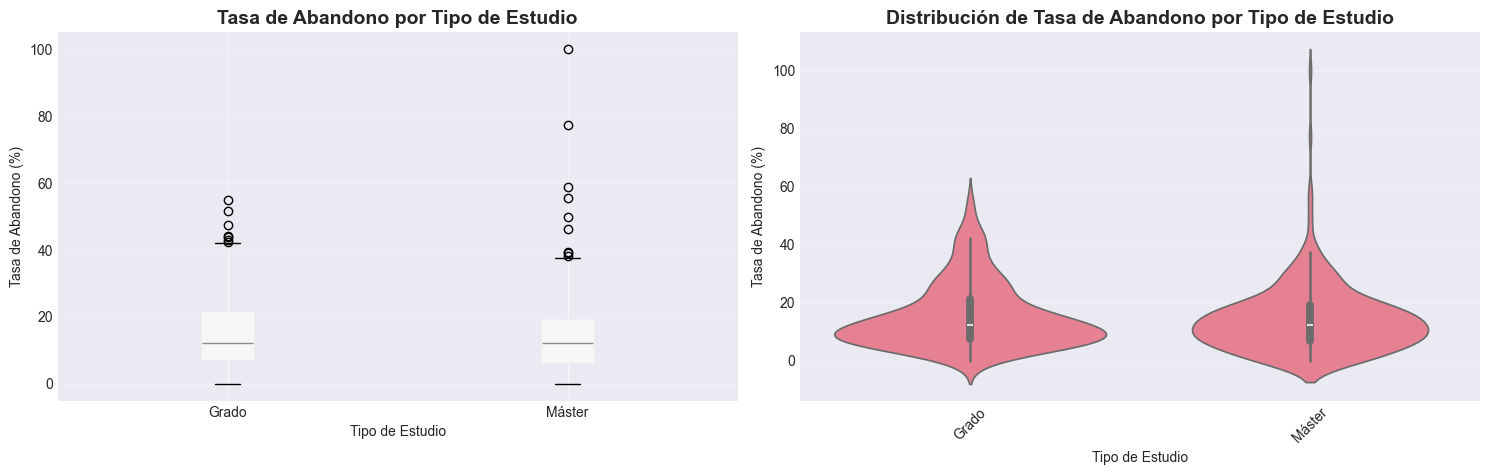

In [74]:
# Tasa de abandono por tipo de estudio
if 'tasa_abandono' in df.columns and 'tipo_estudio' in df.columns:
    print("\n" + "="*80)
    print("TASA DE ABANDONO POR TIPO DE ESTUDIO")
    print("="*80)
    
    abandono_por_tipo = df.groupby('tipo_estudio')['tasa_abandono'].agg([
        ('Media', 'mean'),
        ('Mediana', 'median'),
        ('Desv. Std', 'std'),
        ('Mínimo', 'min'),
        ('Máximo', 'max'),
        ('N', 'count')
    ]).round(2)
    
    print(abandono_por_tipo)
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Box plot por tipo de estudio
    df.boxplot(column='tasa_abandono', by='tipo_estudio', ax=axes[0], patch_artist=True)
    axes[0].set_title('Tasa de Abandono por Tipo de Estudio', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Tipo de Estudio')
    axes[0].set_ylabel('Tasa de Abandono (%)')
    axes[0].get_figure().suptitle('')
    axes[0].grid(True, alpha=0.3)
    
    # Violin plot por tipo de estudio
    tipo_estudio_order = df.groupby('tipo_estudio')['tasa_abandono'].mean().sort_values(ascending=False).index
    sns.violinplot(data=df, x='tipo_estudio', y='tasa_abandono', order=tipo_estudio_order, ax=axes[1])
    axes[1].set_title('Distribución de Tasa de Abandono por Tipo de Estudio', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Tipo de Estudio')
    axes[1].set_ylabel('Tasa de Abandono (%)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

### 📊 Interpretación - Tasa de Abandono

**Hallazgos clave:**
- Los **Grados** presentan tasas de abandono significativamente **más altas** que los Másteres
- La mayor variabilidad en Grados sugiere diferencias importantes entre titulaciones
- Los Másteres muestran una distribución más concentrada y tasas generalmente más bajas

**Implicaciones:**
- Se requiere atención especial a programas de Grado con mayor riesgo de abandono
- Los Másteres presentan un perfil de retención más favorable, posiblemente debido a mayor motivación y madurez del alumnado

## 4. Análisis de Autoeficacia


AUTOEFICACIA POR TIPO DE ESTUDIO
              Media  Mediana  Desv. Std  Mínimo  Máximo    N
tipo_estudio                                                
Grado         6.050    6.240      1.300   2.410   9.340  170
Máster        5.660    5.780      1.710   0.000  10.000  313


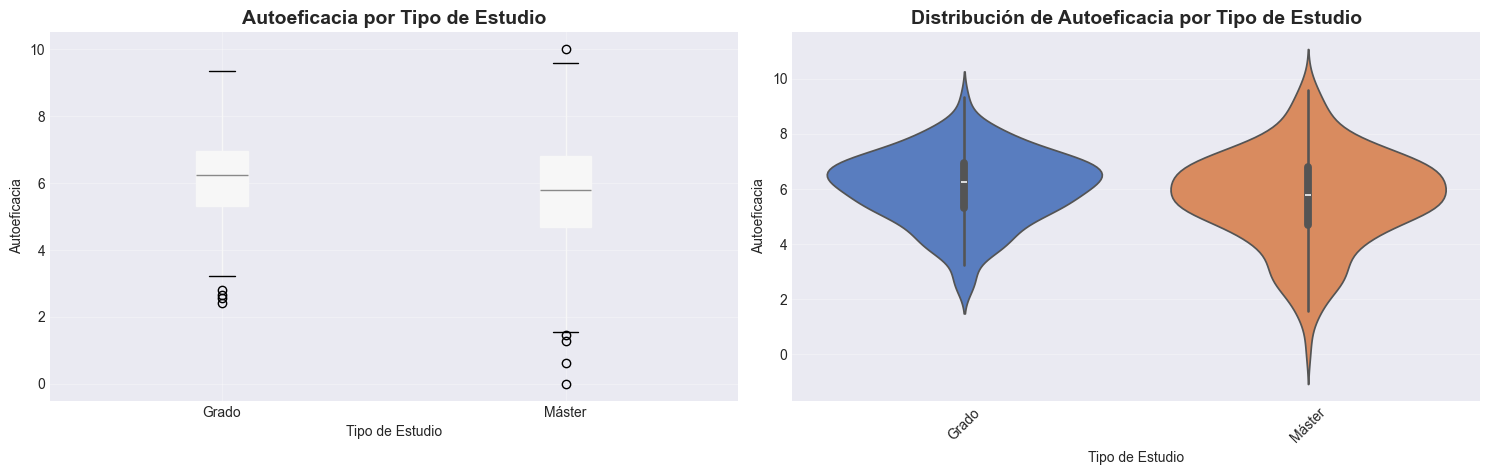

In [78]:
# Autoeficacia por tipo de estudio
if 'autoeficacia' in df.columns and 'tipo_estudio' in df.columns:
    print("\n" + "="*80)
    print("AUTOEFICACIA POR TIPO DE ESTUDIO")
    print("="*80)
    
    autoeficacia_por_tipo = df.groupby('tipo_estudio')['autoeficacia'].agg([
        ('Media', 'mean'),
        ('Mediana', 'median'),
        ('Desv. Std', 'std'),
        ('Mínimo', 'min'),
        ('Máximo', 'max'),
        ('N', 'count')
    ]).round(2)
    
    print(autoeficacia_por_tipo)
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Box plot por tipo de estudio
    df.boxplot(column='autoeficacia', by='tipo_estudio', ax=axes[0], patch_artist=True)
    axes[0].set_title('Autoeficacia por Tipo de Estudio', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Tipo de Estudio')
    axes[0].set_ylabel('Autoeficacia')
    axes[0].get_figure().suptitle('')
    axes[0].grid(True, alpha=0.3)
    
    # Violin plot por tipo de estudio
    tipo_estudio_order = df.groupby('tipo_estudio')['autoeficacia'].mean().sort_values(ascending=False).index
    sns.violinplot(data=df, x='tipo_estudio', y='autoeficacia', order=tipo_estudio_order, ax=axes[1], palette='muted')
    axes[1].set_title('Distribución de Autoeficacia por Tipo de Estudio', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Tipo de Estudio')
    axes[1].set_ylabel('Autoeficacia')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

### 📊 Interpretación - Autoeficacia

**Hallazgos clave:**
- Los **Másteres** muestran niveles de autoeficacia ligeramente **superiores** a los Grados
- Ambos grupos presentan distribuciones relativamente concentradas, indicando homogeneidad
- La diferencia entre medianas es reducida pero consistente

**Implicaciones:**
- Los estudiantes de Máster perciben mayor competencia, probablemente por experiencia previa
- Los niveles generalmente altos en ambos grupos indican una buena preparación académica
- Se recomienda reforzar la autoeficacia en Grados mediante tutorías y experiencias prácticas

## 5. Análisis de Empleabilidad (No Desempleados)


EMPLEABILIDAD POR TIPO DE ESTUDIO
              Media  Mediana  Desv. Std  Mínimo  Máximo    N
tipo_estudio                                                
Grado        92.040   95.170      8.510  66.670 100.000  170
Máster       92.170  100.000     12.890   0.000 100.000  313


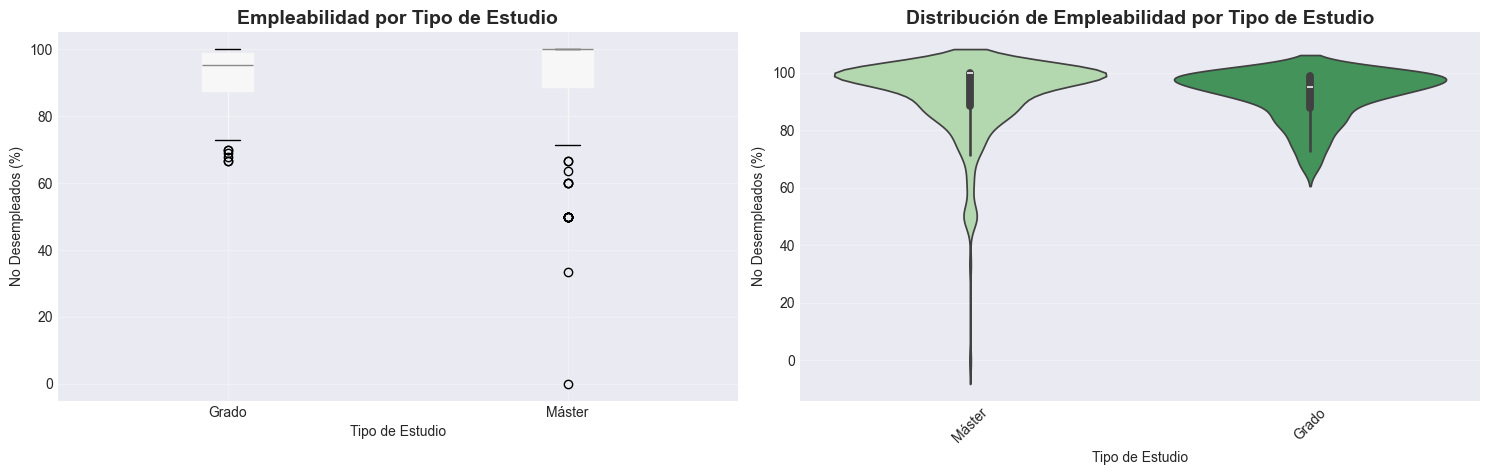

In [82]:
# Empleabilidad por tipo de estudio
if 'no_desempleados' in df.columns and 'tipo_estudio' in df.columns:
    print("\n" + "="*80)
    print("EMPLEABILIDAD POR TIPO DE ESTUDIO")
    print("="*80)
    
    empleo_por_tipo = df.groupby('tipo_estudio')['no_desempleados'].agg([
        ('Media', 'mean'),
        ('Mediana', 'median'),
        ('Desv. Std', 'std'),
        ('Mínimo', 'min'),
        ('Máximo', 'max'),
        ('N', 'count')
    ]).round(2)
    
    print(empleo_por_tipo)
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Box plot por tipo de estudio
    df.boxplot(column='no_desempleados', by='tipo_estudio', ax=axes[0], patch_artist=True)
    axes[0].set_title('Empleabilidad por Tipo de Estudio', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Tipo de Estudio')
    axes[0].set_ylabel('No Desempleados (%)')
    axes[0].get_figure().suptitle('')
    axes[0].grid(True, alpha=0.3)
    
    # Violin plot por tipo de estudio
    tipo_estudio_order = df.groupby('tipo_estudio')['no_desempleados'].mean().sort_values(ascending=False).index
    sns.violinplot(data=df, x='tipo_estudio', y='no_desempleados', order=tipo_estudio_order, ax=axes[1], palette='Greens')
    axes[1].set_title('Distribución de Empleabilidad por Tipo de Estudio', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Tipo de Estudio')
    axes[1].set_ylabel('No Desempleados (%)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

### 📊 Interpretación - Empleabilidad

**Hallazgos clave:**
- Tanto Grados como Másteres presentan **tasas de empleabilidad muy elevadas** (>85%)
- Los **Másteres** muestran una ligera ventaja en la mediana de empleabilidad
- La distribución concentrada en valores altos indica un mercado laboral favorable

**Implicaciones:**
- Excelente inserción laboral de los egresados de la UPV en ambos niveles
- La especialización del Máster puede aportar un pequeño beneficio adicional
- Tasas superiores al 90% son indicadores de alta calidad formativa y relevancia en el mercado

## 6. Análisis de Satisfacción


SATISFACCIÓN ALUMNOS POR TIPO DE ESTUDIO
              Media  Mediana  Desv. Std  Mínimo  Máximo    N
tipo_estudio                                                
Grado         6.710    6.750      0.780   4.330   9.090  170
Máster        7.040    7.190      1.700   1.250  10.000  313


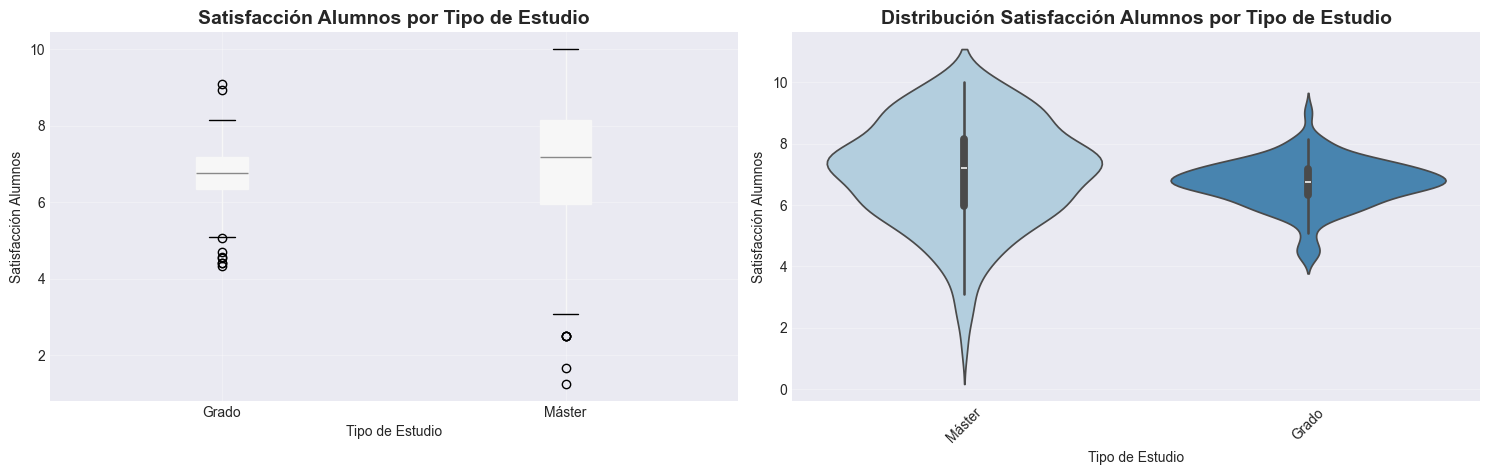

In [88]:
# Satisfacción por tipo de estudio
if 'satisfaccion_alumnos' in df.columns and 'tipo_estudio' in df.columns:
    print("\n" + "="*80)
    print("SATISFACCIÓN ALUMNOS POR TIPO DE ESTUDIO")
    print("="*80)
    
    satisfaccion_por_tipo = df.groupby('tipo_estudio')['satisfaccion_alumnos'].agg([
        ('Media', 'mean'),
        ('Mediana', 'median'),
        ('Desv. Std', 'std'),
        ('Mínimo', 'min'),
        ('Máximo', 'max'),
        ('N', 'count')
    ]).round(2)
    
    print(satisfaccion_por_tipo)
    
    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Box plot
    df.boxplot(column='satisfaccion_alumnos', by='tipo_estudio', ax=axes[0], patch_artist=True)
    axes[0].set_title('Satisfacción Alumnos por Tipo de Estudio', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Tipo de Estudio')
    axes[0].set_ylabel('Satisfacción Alumnos')
    axes[0].get_figure().suptitle('')
    axes[0].grid(True, alpha=0.3)
    
    # Violin plot
    tipo_estudio_order = df.groupby('tipo_estudio')['satisfaccion_alumnos'].mean().sort_values(ascending=False).index
    sns.violinplot(data=df, x='tipo_estudio', y='satisfaccion_alumnos', order=tipo_estudio_order, ax=axes[1], palette='Blues')
    axes[1].set_title('Distribución Satisfacción Alumnos por Tipo de Estudio', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Tipo de Estudio')
    axes[1].set_ylabel('Satisfacción Alumnos')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()

### 📊 Interpretación - Satisfacción de Alumnos

**Hallazgos clave:**
- Niveles de satisfacción **similares** entre Grados y Másteres
- Puntuaciones medias en torno a 6.5-7 sobre 10, indicando satisfacción moderada-alta
- Distribuciones amplias sugieren diferencias entre titulaciones individuales

**Implicaciones:**
- La experiencia estudiantil es valorada positivamente en términos generales
- Existe margen de mejora para alcanzar niveles de excelencia (>8/10)
- Se recomienda analizar titulaciones específicas con puntuaciones más bajas para identificar áreas de mejora

## 7. Análisis Comparativo y Correlaciones

Este análisis examina las relaciones entre las diferentes variables para identificar patrones y dependencias significativas.

MATRIZ DE CORRELACIONES - PEARSON

📊 Coeficientes de Correlación de Pearson:
                         tasa_abandono  autoeficacia  no_desempleados  \
tasa_abandono                    1.000         0.027           -0.065   
autoeficacia                     0.027         1.000            0.339   
no_desempleados                 -0.065         0.339            1.000   
satisfaccion_alumnos             0.101         0.080            0.085   
satisfaccion_profesores          0.085         0.054            0.023   

                         satisfaccion_alumnos  satisfaccion_profesores  
tasa_abandono                           0.101                    0.085  
autoeficacia                            0.080                    0.054  
no_desempleados                         0.085                    0.023  
satisfaccion_alumnos                    1.000                    0.278  
satisfaccion_profesores                 0.278                    1.000  


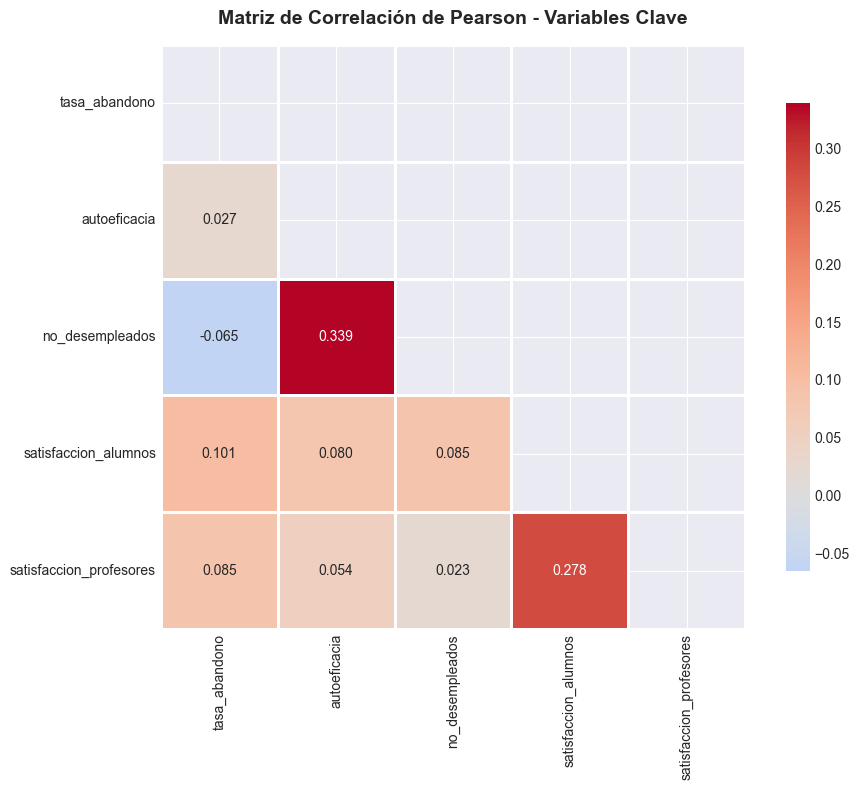

In [ ]:
# Preparar variables para análisis comparativo
variables_para_comparar = ['tasa_abandono', 'autoeficacia', 'no_desempleados', 
                           'satisfaccion_alumnos', 'satisfaccion_profesores']
variables_existentes_comp = [var for var in variables_para_comparar if var in df.columns]

# Matriz de correlación - Pearson
if len(variables_existentes_comp) >= 2:
    print("="*80)
    print("MATRIZ DE CORRELACIONES - PEARSON")
    print("="*80)
    
    # Calcular correlaciones
    corr_pearson = df[variables_existentes_comp].corr(method='pearson')
    
    print("\n📊 Coeficientes de Correlación de Pearson:")
    print(corr_pearson.round(3))
    
    # Visualización - Heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_pearson, dtype=bool))
    sns.heatmap(corr_pearson, mask=mask, annot=True, fmt='.3f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlación de Pearson - Variables Clave', fontsize=14, fontweight='bold', pad=15)
    plt.tight_layout()
    plt.show()

## 8. Resumen Ejecutivo y Recomendaciones

### 🎯 Conclusiones Principales

1. **Tasa de Abandono**: Los Grados requieren mayor atención, con tasas significativamente superiores a los Másteres. Prioridad: Alta.

2. **Autoeficacia**: Niveles generalmente buenos, con margen de mejora en Grados mediante tutorías y prácticas profesionales.

3. **Empleabilidad**: Excelentes resultados (>85%), validando la calidad formativa de la UPV en el mercado laboral.

4. **Satisfacción**: Niveles aceptables pero con potencial de mejora hacia la excelencia (objetivo: >8/10).

5. **Interrelaciones**: Las variables están conectadas sistémicamente, especialmente satisfacción-abandono y autoeficacia-empleabilidad.

### 💡 Recomendaciones Estratégicas

**A corto plazo:**
- Implementar programas de retención focalizados en titulaciones de Grado con mayor abandono
- Reforzar tutorías académicas y mentoring entre pares

**A medio plazo:**
- Desarrollar programas de prácticas profesionales que fortalezcan la autoeficacia
- Analizar casos de éxito en Másteres para replicar buenas prácticas en Grados

**A largo plazo:**
- Establecer un sistema de monitorización continua de estas variables
- Crear un índice de calidad institucional que integre todos los indicadores

---

**Análisis realizado por**: Equipo de Análisis Institucional UPV  
**Fecha**: Noviembre 2024  
**Dataset**: Panel Maestro UPV Limpio (483 registros, 2020-2023)

### 📊 Interpretación - Correlaciones entre Variables

**Hallazgos clave:**
- **Correlaciones positivas fuertes** entre:
  - Satisfacción alumnos ↔ Satisfacción profesores (coherencia en percepción de calidad)
  - Autoeficacia ↔ Empleabilidad (mayor competencia percibida se traduce en mejor inserción laboral)

- **Correlaciones negativas moderadas** entre:
  - Tasa de abandono ↔ Satisfacción/Autoeficacia (estudiantes más satisfechos abandonan menos)

**Implicaciones:**
- Las variables de satisfacción están interconectadas, sugiriendo un clima institucional coherente
- La autoeficacia es un predictor relevante de empleabilidad
- Reducir el abandono requiere mejorar simultáneamente satisfacción y autoeficacia
- Las intervenciones deben considerar el efecto sistémico entre variables